In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import tensorflow_datasets as tfds


c:\Users\viren\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

Image Pixel array : [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 120 249 229 143  43  34  34  34  34  34  34  34  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 180 252 252 252 252 252 252 252 253 252 252 252 236 176  44   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  17 101 153 153 244 252 252 252 25

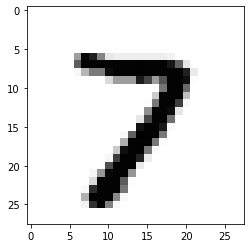

In [3]:
index =4000
np.set_printoptions(linewidth=320)
print(f'Image Pixel array : {train_images[index]}')
print(f'\n LABEL: {train_labels[index]}')

#visualize the image
plt.imshow(train_images[index], cmap='Greys')


In [4]:
#size of np array
print(f'Shape of train_images: {train_images.shape}')

Shape of train_images: (60000, 28, 28)


# Normalization

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0


# Model

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Flatten, Conv2D, MaxPooling2D, Dropout

#creating new model 
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))

In [7]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2616 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1157 - accuracy: 0.9661
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0774 - accuracy: 0.9772
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0444 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9893
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0273 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0220 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0187 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.016

In [8]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9800


[0.07340183854103088, 0.9800000190734863]

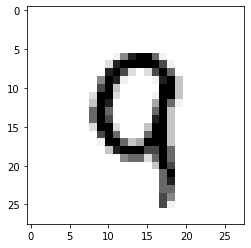

In [9]:
trial_index = 1090
plt.imshow(test_images[trial_index], cmap='Greys')


In [10]:
print(type(test_images))

<class 'numpy.ndarray'>


In [11]:
#dimension of np array
print(f'Shape of test_images: {test_images.shape}')

Shape of test_images: (10000, 28, 28)


In [12]:
classification = model.predict(test_images)

print(f'classification : {classification[trial_index]}')


classification : [2.8015715e-05 1.4417531e-12 2.7201038e-05 2.3421165e-08 3.0438032e-04 3.3286476e-08 5.1190669e-09 2.2502265e-05 8.6058644e-06 9.9960929e-01]


In [13]:
print(f'Label : {test_labels[trial_index]}')


Label : 9


In [14]:
from PIL import Image
from numpy import asarray

img = Image.open('image.png')

In [15]:
numpydata = asarray(img)

# <class 'numpy.ndarray'>
print(type(numpydata))
  
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(32, 32, 3)


Shape of res: (28, 28)


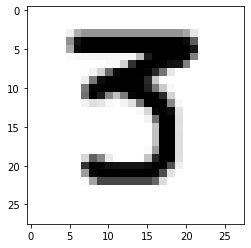

In [57]:
# np.set_printoptions(linewidth=320)
# print(f'Image Pixel array : {numpydata}')
# print(f'\n LABEL: {numpydata}')

# #visualize the image


img2 = cv2.imread('image.png' )
img2 = img2[:,:,0]
res = cv2.resize(img2, (28, 28))
# img_flatten = res.reshape(1, 28, 28, 1)


# img_flatten = res.flatten()
# img_flatten = img_flatten.reshape().T


# img_array = cv2.imread('image.png', cv2.IMREAD_GRAYSCALE)

# img_pil = Image.fromarray(img_array)
# img_28x28 = np.array(img_pil.resize((1,28, 28,1), Image.ANTIALIAS))

# img_array = (img_28x28.flatten())

# img_array  = img_array.reshape(-1,1).T
# res = res-255

print(f'Shape of res: {res.shape}')
plt.imshow(res, cmap='Greys')
res = res/255
#flatten res

#reshape res
# res = res.reshape(1, 28, 28, 1)
# print(res)
pred = model.predict(res.flatten().reshape(1, 28, 28, 1))


In [51]:
print(res)

[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.10980392

In [52]:
print(pred)

[[3.7979065e-17 4.5282245e-04 2.2298743e-09 1.4340752e-01 1.0309547e-21 8.5613966e-01 2.1570825e-18 2.1760994e-11 4.5788162e-10 8.0136342e-10]]


In [56]:
#predict label
print(np.argmax(pred))

5
